Source:<br>
Paulo Cortez, University of Minho, GuimarÃ£es, Portugal, http://www3.dsi.uminho.pt/pcortez<br>

Data Set Information:<br>
This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school-related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).<br>

Attribute Information:<br>
school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)<br>
sex - student's sex (binary: 'F' - female or 'M' - male)<br>
age - student's age (numeric: from 15 to 22)<br>
address - student's home address type (binary: 'U' - urban or 'R' - rural)<br>
famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)<br>
Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)<br>
Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)<br>
Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)<br>
Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')<br>
Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')<br>
reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')<br>
guardian - student's guardian (nominal: 'mother', 'father' or 'other')<br>
traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)<br>
studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)<br>
failures - number of past class failures (numeric: n if 1<=n<3, else 4)<br>
schoolsup - extra educational support (binary: yes or no)<br>
famsup - family educational support (binary: yes or no)<br>
paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)<br>
activities - extra-curricular activities (binary: yes or no)<br>
nursery - attended nursery school (binary: yes or no)<br>
higher - wants to take higher education (binary: yes or no)<br>
internet - Internet access at home (binary: yes or no)<br>
romantic - with a romantic relationship (binary: yes or no)<br>
famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)<br>
freetime - free time after school (numeric: from 1 - very low to 5 - very high)<br>
goout - going out with friends (numeric: from 1 - very low to 5 - very high)<br>
Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)<br>
Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)<br>
health - current health status (numeric: from 1 - very bad to 5 - very good)<br>
absences - number of school absences (numeric: from 0 to 93)<br>

<font size=6>目标</font>

<font size=4 color='#4682B4'>本文从个人、家庭、学校三个维度展开分析， 探讨各维度对测验成绩的影响。<br>
   本文的数据预处理、可视化部分由python实现，相关性分析和建模由R语言实现

<font size=6>索引</font>

<a href='#personal'>个人维度</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;<a href='#personal_sex'>性别</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;<a href='#personal_high'>接受高等教育的意愿</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;<a href='#personal_romantic'>情感状态</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;<a href='#personal_stime'>学习时间</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;<a href='#personal_ftime'>自由时间</a><br>
<a href='#family_address'>家庭维度</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;<a href='#family_address'>居住地</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;<a href='#family_size'>家庭规模</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;<a href='#family_dev'>父母婚姻状况</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;<a href='#family_edu'>父母教育背景</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;<a href='#family_career'>父母职业</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;<a href='#family_sup'>家庭辅导</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;<a href='#family_paid'>课外辅导</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;<a href='#family_internet'>网络环境</a><br>
<a href='#sc_school'>学校维度</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;<a href='#sc_school'>学校之间</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;<a href='#sc_sup'>学校辅导</a><br>
&nbsp;&nbsp;&nbsp;&nbsp;<a href='#sc_ab'>缺席和挂科</a><br>
<a href='#summary'>总结</a><br>


<font size=6 >数据预处理</font>


In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

<font size=4 color='#4682B4'>描述整体数据

In [2]:
df = pd.read_csv('data/student-mat.csv')

In [13]:
df.shape

(395, 33)

<font size=4 color='#4682B4'>共有395行、33列<br>涉及个人（年龄、性别、两性关系、学习时间、自由时间等）、家庭（家庭构成、双亲职业、双亲受教育程度、网络环境、住址等）、学校（测试成绩、学校辅导、缺勤数等）三个维度

In [8]:
df[:5]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


<font size=4 color='#4682B4'>三个分数G1、G2、G3较为发散，但是数值太小了，我打算转换成百分数。

<font size=4 color='#4682B4'>检查数据质量

In [13]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

<font size=4 color='#4682B4'>无缺失值，无需填充

In [17]:
df.drop_duplicates(inplace=True)  # 去重

In [18]:
df.shape

(395, 33)

<font size=4 color='#4682B4'>将分数转换为百分数

In [3]:
df[['G1', 'G2', 'G3']] = df[['G1', 'G2', 'G3']] / 20 * 100

In [4]:
df[['G1', 'G2', 'G3']] = round(df[['G1', 'G2', 'G3']])

In [25]:
df[['G1', 'G2', 'G3']].describe()

,G1,G2,G3
count,395.000000,395.000000,395.000000
mean,54.544304,53.569620,52.075949
std,16.595973,18.807523,22.907213
min,15.000000,0.000000,0.000000
25%,40.000000,45.000000,40.000000
50%,55.000000,55.000000,55.000000
75%,65.000000,65.000000,70.000000
max,95.000000,95.000000,100.000000


In [29]:
df.dtypes

school         object
sex            object
age             int64
address        object
famsize        object
Pstatus        object
Medu            int64
Fedu            int64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel          int64
freetime        int64
goout           int64
Dalc            int64
Walc            int64
health          int64
absences        int64
G1            float64
G2            float64
G3            float64
dtype: object

<font size=4 color='#4682B4'>数据类型较为合理，暂且不作改动。其中有不少是分类变量，为了之和对分类变量进行统计，需要创建相应的哑变量，包括：Mjob、Fjob、reason和famsize

In [5]:
lst = ['Mjob', 'Fjob', 'reason', 'famsize']
for item in lst:
    df = pd.merge(df, pd.get_dummies(df[item]), right_index=True, left_index=True)
df.shape

(395, 49)

In [32]:
df[:5]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health_x,absences,G1,G2,G3,at_home_x,health_y,other_x,services_x,teacher_x,at_home_y,health,other_y,services_y,teacher_y,course,home,other,reputation,GT3,LE3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,25.0,30.0,30.0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,25.0,25.0,30.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,35.0,40.0,50.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,75.0,70.0,75.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,30.0,50.0,50.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0


<font size=4 color='#4682B4'>在职业分类中后缀为x的是母亲职业，y的是父亲职业<br><br>
    此外，因为G3成绩是G1和G2的加权平均，所以本文主要对G3进行分析。<br>将G3分数划分为3个组以生成顺序分类

In [5]:
bins = np.linspace(min(df['G3']), max(df['G3']), 4)
group_names = ['low', 'mid', 'high']
df['grade_binned'] = pd.cut(df['G3'], bins, labels=group_names, include_lowest=True)

In [7]:
df.grade_binned

0       low
1       low
2       mid
3      high
4       mid
       ... 
390     mid
391    high
392     mid
393     mid
394     mid
Name: grade_binned, Length: 395, dtype: category
Categories (3, object): [low < mid < high]

<font size=4 color='#4682B4'>本文将使用R语言对数据进行线性回归分析、多元回归分析、非条件logistic相关分析、卡方检验、行均分检验、spearman秩和检验、wilcoxon秩和检验、kruskal-waillis秩和检验因此要装入相应的包

In [1]:
df = read.csv('data/student-mat2.csv')

In [2]:
install.packages('gmodels')  
install.packages('vcdExtra')
install.packages('nparcomp')

also installing the dependencies ‘gtools’, ‘gdata’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘lmtest’, ‘qvcalc’, ‘relimp’, ‘vcd’, ‘gnm’, ‘ca’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘TH.data’, ‘sandwich’, ‘multcomp’, ‘mvtnorm’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [1]:
df.to_csv('data/student-mat2.csv')

ERROR: Error in df.to_csv("data/student-mat2.csv"): could not find function "df.to_csv"


In [3]:
df2 = df
df2$grade_binned = ifelse(df2$grade_binned == 'low', 1, ifelse(df2$grade_binned == 'mid', 2, 3))

In [3]:
shapiro.test(df$G3)
shapiro.test(df$failures)
shapiro.test(df$absences)


	Shapiro-Wilk normality test

data:  df$G3
W = 0.92873, p-value = 8.836e-13



	Shapiro-Wilk normality test

data:  df$failures
W = 0.50707, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  df$absences
W = 0.66683, p-value < 2.2e-16


<font size=4 color='#4682B4'>三组数据的p值都小于0.05，皆不符合正态分布,因此采用非参数检验

<font size=6 color='#4682B4' id='personal'>个人维度</font>

<font size=5 color='#5CADAD' id='personal_age'>年龄</font>

Text(-0.8, 2.5, "students ' age")

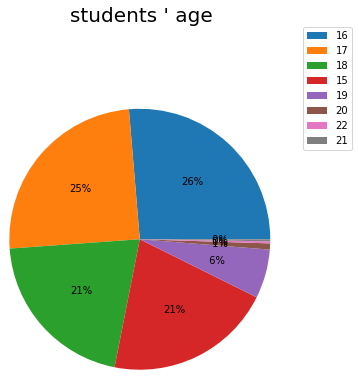

In [37]:
df_age = df['age'].value_counts()
counts = list(df_age.values)
labels = list(df_age.index)
plt.pie(counts, autopct='%2.0f%%', radius=1.5)
plt.legend(loc='best', labels = labels, bbox_to_anchor=(1.5, 1.5))
plt.text(-0.8, 2.5, 'students \' age', fontsize=20)

<font size=4 color='#4682B4'>该数据集主要由15、16、17、18岁的学生构成，分布较为均匀

<font size=5 color='#5CADAD' id='personal_sex'>性别</font>

Text(-0.8, 2.5, "students ' gender")

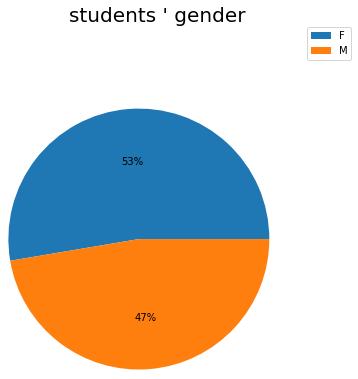

In [36]:
df_age = df['sex'].value_counts()
counts = list(df_age.values)
labels = list(df_age.index)
plt.pie(counts, autopct='%2.0f%%', radius=1.5)
plt.legend(loc='best', labels = labels, bbox_to_anchor=(1.5, 1.5))
plt.text(-0.8, 2.5, 'students \' gender', fontsize=20)

In [21]:
wilcox.test(df$G3 ~ df$sex, conf.level = 0.95)


	Wilcoxon rank sum test with continuity correction

data:  df$G3 by df$sex
W = 17138, p-value = 0.04065
alternative hypothesis: true location shift is not equal to 0


In [4]:
library(gmodels)
df_temp = data.frame(sex = df2$sex, grade = df2$grade_binned)
mytable = xtabs(~df_temp$sex + df_temp$grade)
CrossTable(df_temp$sex, df_temp$grade)
library(vcdExtra)
CMHtest(mytable)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  395 

 
             | df_temp$grade 
 df_temp$sex |         1 |         2 |         3 | Row Total | 
-------------|-----------|-----------|-----------|-----------|
           F |        40 |       122 |        46 |       208 | 
             |     1.932 |     0.012 |     0.842 |           | 
             |     0.192 |     0.587 |     0.221 |     0.527 | 
             |     0.656 |     0.521 |     0.460 |           | 
             |     0.101 |     0.309 |     0.116 |           | 
-------------|-----------|-----------|-----------|-----------|
           M |        21 |       112 |        54 |       187 | 
             |     2.149 |     0.013 |     0.936 |           | 
             |     0.112 |     0.599 |     0.289 |     0.473 | 
           

Loading required package: vcd
Loading required package: grid
Loading required package: gnm


Cochran-Mantel-Haenszel Statistics for df_temp$sex by df_temp$grade 

                 AltHypothesis  Chisq Df     Prob
cor        Nonzero correlation 5.3803  1 0.020365
rmeans  Row mean scores differ 5.3803  1 0.020365
cmeans  Col mean scores differ 5.8707  2 0.053113
general    General association 5.8707  2 0.053113


<font size=4 color='#4682B4'>样本的男女分布较均匀，结合wilcoxon检验和行均分检验可知不同性别学习者的学习成绩有显著性差异

<font size=5 color='#5CADAD' id='personal_high'>接受高等教育的意愿</font>

Text(0.5, 1.0, 'the willing to get higher education')

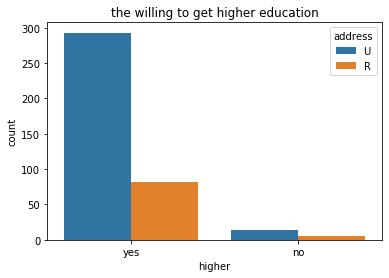

In [21]:
plt.figure()
sns.countplot(data=df, x='higher', hue='address')
plt.title('the willing to get higher education')

<font size=4 color='#4682B4'>可见志愿接受高等教育的人数远大于不愿意接受高等教育的人数，样本分布不均匀无法进行有效的分析

<font size=5 color='#5CADAD' id='personal_romantic'>情感状态</font>

In [5]:
library(gmodels)
df_temp = data.frame(romantic = df2$romantic, grade = df2$grade_binned)
mytable = xtabs(~df_temp$romantic + df_temp$grade)
CrossTable(df_temp$romantic, df_temp$grade)
library(vcdExtra)
CMHtest(mytable)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  395 

 
                 | df_temp$grade 
df_temp$romantic |         1 |         2 |         3 | Row Total | 
-----------------|-----------|-----------|-----------|-----------|
              no |        36 |       153 |        74 |       263 | 
                 |     0.524 |     0.050 |     0.826 |           | 
                 |     0.137 |     0.582 |     0.281 |     0.666 | 
                 |     0.590 |     0.654 |     0.740 |           | 
                 |     0.091 |     0.387 |     0.187 |           | 
-----------------|-----------|-----------|-----------|-----------|
             yes |        25 |        81 |        26 |       132 | 
                 |     1.045 |     0.100 |     1.647 |           | 
                 |     0.189 | 

Cochran-Mantel-Haenszel Statistics for df_temp$romantic by df_temp$grade 

                 AltHypothesis  Chisq Df     Prob
cor        Nonzero correlation 4.1304  1 0.042119
rmeans  Row mean scores differ 4.1304  1 0.042119
cmeans  Col mean scores differ 4.1825  2 0.123535
general    General association 4.1825  2 0.123535


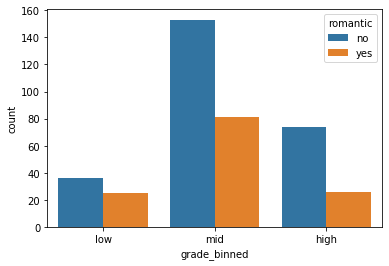

In [45]:
sns.countplot(data=df, x='grade_binned', hue='romantic')

<font size=4 color='#4682B4'>由于行均分检验的p值小于0.05，可得出结论：有亲密关系的学生与无亲密关系的学生的考试成绩有显著性差异，无亲密关系的学生在中、高档成绩中占比更大。

<font size=5 color='#5CADAD' id='personal_stime'>学习时间</font>

In [22]:
df_temp = data.frame(studytime = df2$studytime, grade = df2$grade_binned)
cor(df_temp, method = 'spearman')
cor.test(jitter(df_temp$studytime), jitter(df_temp$grade), method = 'spearman')

,studytime,grade
studytime,1.000000,0.122722
grade,0.122722,1.000000



	Spearman's rank correlation rho

data:  jitter(df_temp$studytime) and jitter(df_temp$grade)
S = 9029500, p-value = 0.01624
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1209251 


In [23]:
library(gmodels)
CrossTable(df_temp$studytime, df_temp$grade)
mytable = xtabs(~df_temp$studytime + df_temp$grade)
chisq.test(mytable)
fit = lm(df_temp$grade ~ df_temp$studytime)
summary(fit)
coefficients(fit)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  395 

 
                  | df_temp$grade 
df_temp$studytime |         1 |         2 |         3 | Row Total | 
------------------|-----------|-----------|-----------|-----------|
                1 |        20 |        60 |        25 |       105 | 
                  |     0.883 |     0.078 |     0.094 |           | 
                  |     0.190 |     0.571 |     0.238 |     0.266 | 
                  |     0.328 |     0.256 |     0.250 |           | 
                  |     0.051 |     0.152 |     0.063 |           | 
------------------|-----------|-----------|-----------|-----------|
                2 |        31 |       128 |        39 |       198 | 
                  |     0.006 |     0.977 |     2.470 |           | 
                  | 

Warning message in chisq.test(mytable):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  mytable
X-squared = 14.488, df = 6, p-value = 0.02463



Call:
lm(formula = df_temp$grade ~ df_temp$studytime)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.28009 -0.18778 -0.09546  0.71991  0.99685 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.91083    0.08293   23.04   <2e-16 ***
df_temp$studytime  0.09231    0.03767    2.45   0.0147 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6276 on 393 degrees of freedom
Multiple R-squared:  0.01505,	Adjusted R-squared:  0.01254 
F-statistic: 6.005 on 1 and 393 DF,  p-value: 0.0147


(Intercept) df_temp$studytime 
       1.91083256        0.09231485

<font size=4 color='#4682B4'>根据给出变量的秩相关系数的检验结果p值小于0.05，可得出结论：学习时间与学习成绩显著相关。<br>
    根据线性趋势检验的结果，学学习时间与学习成绩有直线相关性，且为正相关

Text(0.5, 1.0, "students' studytime")

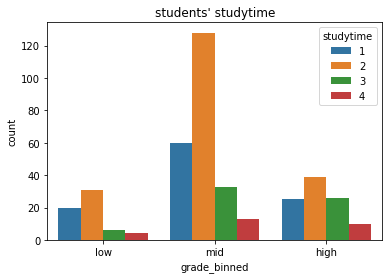

In [19]:
plt.figure()
sns.countplot(data=df, x='grade_binned', hue='studytime')
plt.title('students\' studytime')

<font size=4 color='#4682B4'>从上图可知，学习时间2和3在中高分段占比较多，且学习时间1和4随着分段的上升而减小且在高分段占比最小。可知学习时间定为2、3较为合适，即每周2~10小时。

<font size=5 color='#5CADAD' id='personal_ftime'>自由时间</font>

Text(0.5, 1.0, "students' freetime")

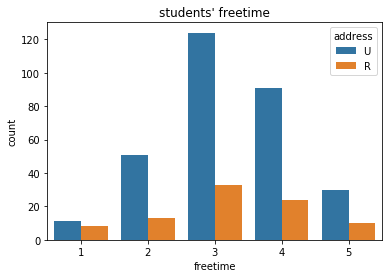

In [23]:
plt.figure()
sns.countplot(data=df, x='freetime', hue='address')
plt.title('students\' freetime')

In [24]:
df_temp = data.frame(freetime = df2$freetime, grade = df2$grade_binned)
cor(df_temp, method = 'spearman')
cor.test(jitter(df_temp$freetime), jitter(df_temp$grade), method = 'spearman')

,freetime,grade
freetime,1.000000000,0.009118523
grade,0.009118523,1.000000000



	Spearman's rank correlation rho

data:  jitter(df_temp$freetime) and jitter(df_temp$grade)
S = 10220000, p-value = 0.9206
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
0.005031943 


<font size=4 color='#4682B4'>根据给出变量的相关系数的检验结果p值大于0.05，可得出结论:自由时间与学习成绩无显著相关性

<font size=6 color='#4682B4' id='family'>家庭维度</font>

<font size=5 color='#5CADAD' id='family_address'>居住地</font>

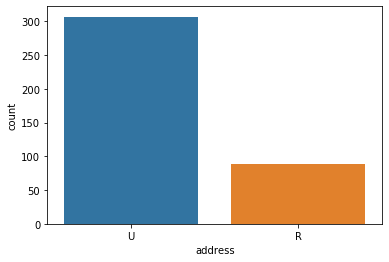

In [25]:
plt.figure()
sns.countplot(x='address', data=df)

<font size=4 color='#4682B4'>该数据集中大部分是城镇生源，小部分为乡村生源

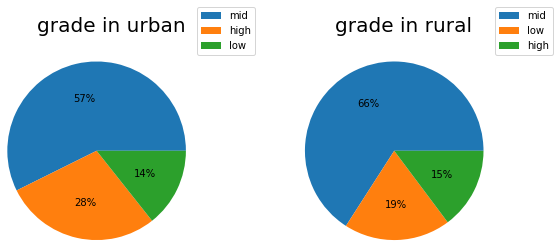

In [23]:
df_U = df[df['address'] == 'U']['grade_binned'].value_counts()
df_R = df[df['address'] == 'R']['grade_binned'].value_counts()

counts_U = list(df_U.values)
labels_U = list(df_U.index)
counts_R = list(df_R.values)
labels_R = list(df_R.index)

plt.figure(figsize=(8, 4))
ax = plt.subplot(1, 2, 1)
plt.pie(counts_U, autopct='%2.0f%%', radius=1.5)
plt.legend(loc='upper right', labels = labels_U, bbox_to_anchor=(1.6, 1.5))
plt.text(-1, 2, 'grade in urban', fontsize=20)
ax = plt.subplot(1, 2, 2)
plt.pie(counts_R, autopct='%2.0f%%', radius=1.5)
plt.legend(loc='upper right', labels = labels_R, bbox_to_anchor=(1.6, 1.5))
plt.text(-1, 2, 'grade in rural', fontsize=20)
plt.subplots_adjust(wspace=1)

<font size=4 color='#4682B4'>从上图可知，在低分段上城镇生源比乡村生源少5%。<br>在中分段上城镇生源比乡村生源少9%<br>在高分段上城镇生源比乡村生源多9%。<br>可见整体上城镇生源比乡村生源的成绩要高

In [9]:
library(gmodels)
df_temp = data.frame(address = df2$address, grade = df2$grade_binned)
mytable = xtabs(~df_temp$address + df_temp$grade)
CrossTable(df_temp$address, df_temp$grade)
library(vcdExtra)
CMHtest(mytable)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  395 

 
                | df_temp$grade 
df_temp$address |         1 |         2 |         3 | Row Total | 
----------------|-----------|-----------|-----------|-----------|
              R |        17 |        58 |        13 |        88 | 
                |     0.856 |     0.661 |     3.864 |           | 
                |     0.193 |     0.659 |     0.148 |     0.223 | 
                |     0.279 |     0.248 |     0.130 |           | 
                |     0.043 |     0.147 |     0.033 |           | 
----------------|-----------|-----------|-----------|-----------|
              U |        44 |       176 |        87 |       307 | 
                |     0.245 |     0.189 |     1.108 |           | 
                |     0.143 |     0.573 | 

Loading required package: vcd
Loading required package: grid
Loading required package: gnm


Cochran-Mantel-Haenszel Statistics for df_temp$address by df_temp$grade 

                 AltHypothesis  Chisq Df     Prob
cor        Nonzero correlation 5.9018  1 0.015125
rmeans  Row mean scores differ 5.9018  1 0.015125
cmeans  Col mean scores differ 6.9054  2 0.031661
general    General association 6.9054  2 0.031661


<font size=4 color='#4682B4'>由于行均分检验的p值小于0.05，可得出结论：不同出生地在学习成绩上有显著性差异，但从交叉表看两组被试人数差距过大（乡村生源只有88个），各取88个样本重新测试

In [11]:
library(gmodels)
df_u = data.frame(address = df2['address'][df['address'] == 'U'][0:88], grade = df2['grade_binned'][df['address'] == 'U'][0:88])
df_r = data.frame(address = df2['address'][df['address'] == 'R'][0:88], grade = df2['grade_binned'][df['address'] == 'R'][0:88])
df_88 = rbind(df_u, df_r)
mytable = xtabs(~df_88$address + df_88$grade)
CrossTable(df_88$address, df_88$grade)
library(vcdExtra)
CMHtest(mytable)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  176 

 
              | df_88$grade 
df_88$address |         1 |         2 |         3 | Row Total | 
--------------|-----------|-----------|-----------|-----------|
            U |        11 |        48 |        29 |        88 | 
              |     0.643 |     0.472 |     3.048 |           | 
              |     0.125 |     0.545 |     0.330 |     0.500 | 
              |     0.393 |     0.453 |     0.690 |           | 
              |     0.062 |     0.273 |     0.165 |           | 
--------------|-----------|-----------|-----------|-----------|
            R |        17 |        58 |        13 |        88 | 
              |     0.643 |     0.472 |     3.048 |           | 
              |     0.193 |     0.659 |     0.148 |     0.500 | 
 

Cochran-Mantel-Haenszel Statistics for df_88$address by df_88$grade 

                 AltHypothesis  Chisq Df      Prob
cor        Nonzero correlation 6.9861  1 0.0082143
rmeans  Row mean scores differ 6.9861  1 0.0082143
cmeans  Col mean scores differ 8.2771  2 0.0159463
general    General association 8.2771  2 0.0159463


<font size=4 color='#4682B4'>由于行均分检验的p值小于0.01，可得出结论：不同生源的学生的学习成绩有显著性差异，在高分段城镇生源的比重更大，在中分段两生源的成绩相差不大，在低分段乡村生源的占比更大

<font size=5 color='#5CADAD' id='family_size'>家庭规模</font>

In [17]:
wilcox.test(df$G3 ~ df$famsize, conf.level = 0.95)


	Wilcoxon rank sum test with continuity correction

data:  df$G3 by df$famsize
W = 14670, p-value = 0.1885
alternative hypothesis: true location shift is not equal to 0


<font size=4 color='#4682B4'>根据wilcoxon检验的结果，p值大于0.05，可得出结论：家庭规模对学习成绩无显著性差异

<font size=5 color='#5CADAD' id='family_dev'>是否离异</font>

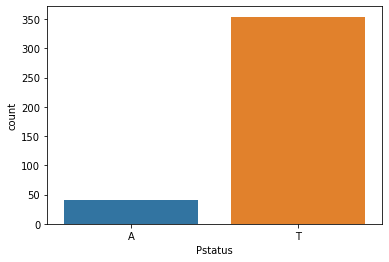

In [27]:
plt.figure()
sns.countplot(x='Pstatus', data=df)

<font size=4 color='#4682B4'>由于数据集中正常家庭的占比远大于单亲家庭，且单亲家庭的样本过少，无法进行有效分析

<font size=5 color='#5CADAD' id='family_edu'>父母教育背景</font>

In [16]:
df_temp = data.frame(Medu = df2$Medu, grade = df2$grade_binned)
cor(df_temp, method='spearman')
cor.test(jitter(df_temp$Medu), jitter(df_temp$grade), method='spearman')

,Medu,grade
Medu,1.0000000,0.2414772
grade,0.2414772,1.0000000



	Spearman's rank correlation rho

data:  jitter(df_temp$Medu) and jitter(df_temp$grade)
S = 8443900, p-value = 0.0003877
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1779335 


<font size=4 color='#4682B4'>根据spearman秩和检验的结果，p值小于0.05，可得出结论：母亲的教育背景与孩子的学习成绩有显著相关性。接下来进行线性趋势检验。

In [18]:
library(gmodels)
df_temp = data.frame(Medu = df2$Medu, grade = df2$grade_binned)
CrossTable(df_temp$Medu, df_temp$grade)
mytable = xtabs(~df_temp$Medu + df_temp$grade)
chisq.test(mytable)
fit = lm(df_temp$grade ~ df_temp$Medu)
summary(fit)
coefficients(fit)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  395 

 
             | df_temp$grade 
df_temp$Medu |         1 |         2 |         3 | Row Total | 
-------------|-----------|-----------|-----------|-----------|
           0 |         0 |         1 |         2 |         3 | 
             |     0.463 |     0.340 |     2.026 |           | 
             |     0.000 |     0.333 |     0.667 |     0.008 | 
             |     0.000 |     0.004 |     0.020 |           | 
             |     0.000 |     0.003 |     0.005 |           | 
-------------|-----------|-----------|-----------|-----------|
           1 |        13 |        42 |         4 |        59 | 
             |     1.660 |     1.421 |     8.008 |           | 
             |     0.220 |     0.712 |     0.068 |     0.149 | 
           

Warning message in chisq.test(mytable):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  mytable
X-squared = 34.14, df = 8, p-value = 3.832e-05



Call:
lm(formula = df_temp$grade ~ df_temp$Medu)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2624 -0.2624 -0.0007  0.7377  1.2610 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.73904    0.08386  20.738  < 2e-16 ***
df_temp$Medu  0.13083    0.02834   4.616 5.31e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6159 on 393 degrees of freedom
Multiple R-squared:  0.05143,	Adjusted R-squared:  0.04901 
F-statistic: 21.31 on 1 and 393 DF,  p-value: 5.308e-06


(Intercept) df_temp$Medu 
   1.7390437    0.1308266

<font size=4 color='#4682B4'>根据线性趋势检验的结果，可得出结论：母亲教育背景对学习成绩有显著直线相关性，且为正相关

In [20]:
df_temp = data.frame(Fedu = df2$Fedu, grade = df2$grade_binned)
cor(df_temp, method='spearman')
cor.test(jitter(df_temp$Fedu), jitter(df_temp$grade), method='spearman')

,Fedu,grade
Fedu,1.0000000,0.1466818
grade,0.1466818,1.0000000



	Spearman's rank correlation rho

data:  jitter(df_temp$Fedu) and jitter(df_temp$grade)
S = 9116600, p-value = 0.02548
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1124396 


<font size=4 color='#4682B4'>根据spearman秩和检验的结果，p值小于0.05，可得出结论：父亲的教育背景与孩子的学习成绩有显著相关性。接下来进行线性趋势检验。

In [19]:
library(gmodels)
df_temp = data.frame(Fedu = df2$Fedu, grade = df2$grade_binned)
CrossTable(df_temp$Fedu, df_temp$grade)
mytable = xtabs(~df_temp$Fedu + df_temp$grade)
chisq.test(mytable)
fit = lm(df_temp$grade ~ df_temp$Fedu)
summary(fit)
coefficients(fit)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  395 

 
             | df_temp$grade 
df_temp$Fedu |         1 |         2 |         3 | Row Total | 
-------------|-----------|-----------|-----------|-----------|
           0 |         0 |         1 |         1 |         2 | 
             |     0.309 |     0.029 |     0.481 |           | 
             |     0.000 |     0.500 |     0.500 |     0.005 | 
             |     0.000 |     0.004 |     0.010 |           | 
             |     0.000 |     0.003 |     0.003 |           | 
-------------|-----------|-----------|-----------|-----------|
           1 |        17 |        53 |        12 |        82 | 
             |     1.485 |     0.403 |     3.696 |           | 
             |     0.207 |     0.646 |     0.146 |     0.208 | 
           

Warning message in chisq.test(mytable):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  mytable
X-squared = 15.33, df = 8, p-value = 0.05304



Call:
lm(formula = df_temp$grade ~ df_temp$Fedu)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.22124 -0.22124 -0.05552  0.77876  1.11020 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.88980    0.07956   23.75  < 2e-16 ***
df_temp$Fedu  0.08286    0.02898    2.86  0.00447 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6259 on 393 degrees of freedom
Multiple R-squared:  0.02039,	Adjusted R-squared:  0.01789 
F-statistic: 8.178 on 1 and 393 DF,  p-value: 0.004466


(Intercept) df_temp$Fedu 
  1.88979565   0.08286217

<font size=4 color='#4682B4'>根据线性趋势检验的结果，可得出结论：父亲教育背景对学习成绩有显著直线相关性，且为正相关

<font size=5 color='#5CADAD' id='family_career'>父母职业</font>

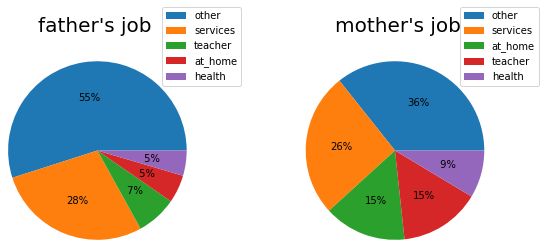

In [41]:
df_fjob = df['Fjob'].value_counts()
df_mjob = df['Mjob'].value_counts()
counts_f = list(df_fjob.values)
labels_f = list(df_fjob.index)
counts_m = list(df_mjob.values)
labels_m = list(df_mjob.index)

plt.figure(figsize=(8, 4))
ax = plt.subplot(1, 2, 1)
plt.pie(counts_f, autopct='%2.0f%%', radius=1.5)
plt.legend(loc='upper right', labels = labels_f, bbox_to_anchor=(1.5, 1.5))
plt.text(-1, 2, 'father\'s job', fontsize=20)
ax = plt.subplot(1, 2, 2)
plt.pie(counts_m, autopct='%2.0f%%', radius=1.5)
plt.legend(loc='upper right', labels = labels_m, bbox_to_anchor=(1.5, 1.5))
plt.text(-1, 2, 'mother\'s job', fontsize=20)
plt.subplots_adjust(wspace=1)

In [38]:
kruskal.test(df$G3 ~ df$Fjob)


	Kruskal-Wallis rank sum test

data:  df$G3 by df$Fjob
Kruskal-Wallis chi-squared = 6.2764, df = 4, p-value = 0.1794


In [7]:
library(gmodels)
df_temp = data.frame(Fjob = df2$Fjob, grade = df2$grade_binned)
mytable = xtabs(~df_temp$Fjob + df_temp$grade)
CrossTable(df_temp$Fjob, df_temp$grade)
library(vcdExtra)
CMHtest(mytable)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  395 

 
             | df_temp$grade 
df_temp$Fjob |         1 |         2 |         3 | Row Total | 
-------------|-----------|-----------|-----------|-----------|
     at_home |         4 |        11 |         5 |        20 | 
             |     0.269 |     0.061 |     0.001 |           | 
             |     0.200 |     0.550 |     0.250 |     0.051 | 
             |     0.066 |     0.047 |     0.050 |           | 
             |     0.010 |     0.028 |     0.013 |           | 
-------------|-----------|-----------|-----------|-----------|
      health |         0 |        12 |         6 |        18 | 
             |     2.780 |     0.168 |     0.457 |           | 
             |     0.000 |     0.667 |     0.333 |     0.046 | 
           

Cochran-Mantel-Haenszel Statistics for df_temp$Fjob by df_temp$grade 

                 AltHypothesis   Chisq Df     Prob
cor        Nonzero correlation  1.2371  1 0.266028
rmeans  Row mean scores differ  8.2620  4 0.082440
cmeans  Col mean scores differ  2.6912  2 0.260384
general    General association 17.6636  8 0.023895


<font size=4 color='#4682B4'>由于Kruskal-Waillis秩和检验和行均分检验的p值都大于0.05，可得出结论：父亲职业不同的孩子的成绩无显著性差异

In [39]:
kruskal.test(df$G3 ~ df$Mjob)
nparcomp(G3 ~ Mjob, data = df, alternative = 'two.sided')$Analysis


	Kruskal-Wallis rank sum test

data:  df$G3 by df$Mjob
Kruskal-Wallis chi-squared = 16.127, df = 4, p-value = 0.002853



 #------Nonparametric Multiple Comparisons for relative contrast effects-----# 
 
 - Alternative Hypothesis:  True relative contrast effect p is not equal to 1/2 
 - Type of Contrast : Tukey 
 - Confidence level: 95 % 
 - Method = Logit - Transformation 
 - Estimation Method: Pairwise rankings 
 
 #---------------------------Interpretation----------------------------------# 
 p(a,b) > 1/2 : b tends to be larger than a 
 #---------------------------------------------------------------------------# 
 


Comparison,Estimator,Lower,Upper,Statistic,p.Value
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"p( at_home , health )",0.701,0.527,0.832,3.1124832,0.01470393
"p( at_home , other )",0.544,0.422,0.660,0.9701388,0.87309891
"p( at_home , services )",0.620,0.493,0.732,2.5746062,0.07170636
"p( at_home , teacher )",0.605,0.459,0.735,1.9647205,0.27838484
"p( health , other )",0.330,0.204,0.487,-2.9243828,0.02849295
"p( health , services )",0.423,0.284,0.575,-1.3772682,0.64334255
"p( health , teacher )",0.411,0.260,0.582,-1.4156176,0.61810412
"p( other , services )",0.579,0.476,0.676,2.0871266,0.22069142
"p( other , teacher )",0.569,0.444,0.686,1.4988646,0.56014470


<font size=4 color='#4682B4'>由于Kruskal-Waillis秩和检验的p值小于0.05，可得出结论：母亲的工作对学习成绩有显著性影响。<br>对不同的职业进行两两比较，可知：母亲是家庭主妇和母亲是从事医疗行业、母亲从事医疗行业和母亲是公务员的孩子的成绩有显著性差异。<br>接下来对父母职业与孩子学习成绩的相关性进行非条件logistic回归分析

In [40]:
df$bin = 0
df['bin'][df['G3'] > 70] = 1

In [41]:
fullfit = glm(bin ~ at_home_x + teacher_x + health_x + services_x + other_x + at_home_y + teacher_y + health_y + services_y + other_y, family = binomial(), data=df)
summary(fullfit)
nothing = glm(bin ~ 1, family = binomial(), data=df)
summary(nothing)
bothways = step(nothing, list(lower=formula(nothing), upper=formula(fullfit)), direction = 'both')


Call:
glm(formula = bin ~ at_home_x + teacher_x + health_x + services_x + 
    other_x + at_home_y + teacher_y + health_y + services_y + 
    other_y, family = binomial(), data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3494  -0.6659  -0.4852  -0.4100   2.2629  

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -0.10806    0.74467  -0.145  0.88462   
at_home_x   -1.59767    0.58788  -2.718  0.00657 **
teacher_x   -0.71771    0.50552  -1.420  0.15568   
health_x    -0.15418    0.09638  -1.600  0.10965   
services_x  -0.43543    0.44830  -0.971  0.33141   
other_x     -1.41721    0.47272  -2.998  0.00272 **
at_home_y    0.30379    0.83830   0.362  0.71706   
teacher_y    1.12037    0.71749   1.562  0.11840   
health_y          NA         NA      NA       NA   
services_y  -0.15751    0.64780  -0.243  0.80789   
other_y     -0.09217    0.62901  -0.147  0.88350   
---
Signif. codes:  0 


Call:
glm(formula = bin ~ 1, family = binomial(), data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.6393  -0.6393  -0.6393  -0.6393   1.8376  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.4841     0.1296  -11.45   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 378.1  on 394  degrees of freedom
Residual deviance: 378.1  on 394  degrees of freedom
AIC: 380.1

Number of Fisher Scoring iterations: 4


Start:  AIC=380.1
bin ~ 1

             Df Deviance    AIC
+ teacher_y   1   369.15 373.15
+ other_x     1   370.22 374.22
+ health_y    1   373.95 377.95
+ services_x  1   374.08 378.08
+ at_home_x   1   374.51 378.51
+ other_y     1   374.69 378.69
<none>            378.10 380.10
+ teacher_x   1   376.74 380.74
+ health_x    1   376.97 380.97
+ at_home_y   1   378.07 382.07
+ services_y  1   378.08 382.08

Step:  AIC=373.15
bin ~ teacher_y

             Df Deviance    AIC
+ other_x     1   362.59 368.59
+ health_y    1   364.09 370.09
+ services_x  1   365.14 371.14
+ at_home_x   1   366.22 372.22
<none>            369.15 373.15
+ health_x    1   367.82 373.82
+ other_y     1   368.34 374.34
+ teacher_x   1   368.90 374.90
+ services_y  1   368.94 374.94
+ at_home_y   1   368.99 374.99
- teacher_y   1   378.10 380.10

Step:  AIC=368.59
bin ~ teacher_y + other_x

             Df Deviance    AIC
+ at_home_x   1   356.33 364.33
+ health_y    1   359.72 367.72
<none>            362.59 36

父亲是教师以及母亲在家或者从事医疗行业对学习成绩有显著性差异

In [42]:
fit1 = glm(bin ~ teacher_y + other_x + at_home_x + health_x, family = binomial(), data=df)
summary(fit1)


Call:
glm(formula = bin ~ teacher_y + other_x + at_home_x + health_x, 
    family = binomial(), data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2369  -0.6718  -0.4881  -0.4263   2.2106  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -0.66055    0.38015  -1.738  0.08228 . 
teacher_y    1.08468    0.41490   2.614  0.00894 **
other_x     -0.97880    0.31677  -3.090  0.00200 **
at_home_x   -1.11688    0.46656  -2.394  0.01667 * 
health_x    -0.14265    0.09511  -1.500  0.13367   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 378.1  on 394  degrees of freedom
Residual deviance: 354.1  on 390  degrees of freedom
AIC: 364.1

Number of Fisher Scoring iterations: 4


In [43]:
fit2 = glm(bin ~ teacher_y + other_x + at_home_x, family = binomial(), data=df)
summary(fit2)
coefficients(fit2)
exp(coefficients(fit2))
exp(confint(fit2))


Call:
glm(formula = bin ~ teacher_y + other_x + at_home_x, family = binomial(), 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1344  -0.7334  -0.4757  -0.4514   2.1607  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.1757     0.1755  -6.698 2.11e-11 ***
teacher_y     1.0736     0.4122   2.604  0.00920 ** 
other_x      -0.9463     0.3148  -3.006  0.00265 ** 
at_home_x    -1.0567     0.4638  -2.278  0.02271 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 378.10  on 394  degrees of freedom
Residual deviance: 356.33  on 391  degrees of freedom
AIC: 364.33

Number of Fisher Scoring iterations: 4


(Intercept)   teacher_y     other_x   at_home_x 
 -1.1756570   1.0736425  -0.9462803  -1.0567165

(Intercept)   teacher_y     other_x   at_home_x 
  0.3086162   2.9260182   0.3881823   0.3475953

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),0.2164387,0.4313989
teacher_y,1.2786015,6.5225020
other_x,0.2040695,0.7061272
at_home_x,0.1270485,0.8069515


对比其他孩子，父亲是教师的孩子考高分的可能性是别的孩子的2.9倍，母亲在家或者从事公务员的工作的孩子考高分的可能性是别的孩子的0.388倍和0.348倍

<font size=4 color='#4682B4'>对于父母的职业，可看出：消去其他因素影响后，父亲是教师的孩子考70以上是父亲非教师的2.92倍，家庭主妇家的孩子考70分以上是母亲工作的0.35倍<br>

<font size=5 color='#5CADAD' id='family_sup'>家庭辅导</font>

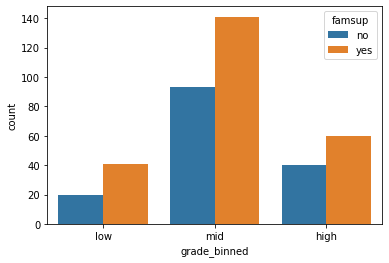

In [47]:
sns.countplot(data=df, x='grade_binned', hue='famsup')

In [8]:
library(gmodels)
df_temp = data.frame(famsup = df2$famsup, grade = df2$grade_binned)
mytable = xtabs(~df_temp$famsup + df_temp$grade)
CrossTable(df_temp$famsup, df_temp$grade)
library(vcdExtra)
CMHtest(mytable)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  395 

 
               | df_temp$grade 
df_temp$famsup |         1 |         2 |         3 | Row Total | 
---------------|-----------|-----------|-----------|-----------|
            no |        20 |        93 |        40 |       153 | 
               |     0.557 |     0.062 |     0.041 |           | 
               |     0.131 |     0.608 |     0.261 |     0.387 | 
               |     0.328 |     0.397 |     0.400 |           | 
               |     0.051 |     0.235 |     0.101 |           | 
---------------|-----------|-----------|-----------|-----------|
           yes |        41 |       141 |        60 |       242 | 
               |     0.352 |     0.039 |     0.026 |           | 
               |     0.169 |     0.583 |     0.248 | 

Cochran-Mantel-Haenszel Statistics for df_temp$famsup by df_temp$grade 

                 AltHypothesis   Chisq Df    Prob
cor        Nonzero correlation 0.64054  1 0.42352
rmeans  Row mean scores differ 0.64054  1 0.42352
cmeans  Col mean scores differ 1.07446  2 0.58437
general    General association 1.07446  2 0.58437


<font size=4 color='#4682B4'>根据行均分的检验结果，p值大于0.05， 可得出结论：得到家庭辅导的学生与未得家庭辅导的学生的成绩无显著性差异，但是从交叉表可看出，未得到家庭辅导的学生人数远小于得到家庭辅导的学生人数，因此各截取153个样本再次进行行均分检验

In [12]:
library(gmodels)
df_u = data.frame(famsup = df2['famsup'][df['famsup'] == 'yes'][0:153], grade = df2['grade_binned'][df['famsup'] == 'yes'][0:153])
df_r = data.frame(famsup = df2['famsup'][df['famsup'] == 'no'][0:153], grade = df2['grade_binned'][df['famsup'] == 'no'][0:153])
df_88 = rbind(df_u, df_r)
mytable = xtabs(~df_88$famsup + df_88$grade)
CrossTable(df_88$famsup, df_88$grade)
library(vcdExtra)
CMHtest(mytable)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  306 

 
             | df_88$grade 
df_88$famsup |         1 |         2 |         3 | Row Total | 
-------------|-----------|-----------|-----------|-----------|
         yes |        29 |        85 |        39 |       153 | 
             |     0.827 |     0.180 |     0.006 |           | 
             |     0.190 |     0.556 |     0.255 |     0.500 | 
             |     0.592 |     0.478 |     0.494 |           | 
             |     0.095 |     0.278 |     0.127 |           | 
-------------|-----------|-----------|-----------|-----------|
          no |        20 |        93 |        40 |       153 | 
             |     0.827 |     0.180 |     0.006 |           | 
             |     0.131 |     0.608 |     0.261 |     0.500 | 
             

Cochran-Mantel-Haenszel Statistics for df_88$famsup by df_88$grade 

                 AltHypothesis   Chisq Df    Prob
cor        Nonzero correlation 0.79701  1 0.37199
rmeans  Row mean scores differ 0.79701  1 0.37199
cmeans  Col mean scores differ 2.01865  2 0.36446
general    General association 2.01865  2 0.36446


<font size=4 color='#4682B4'>根据行均分的检验结果，p值大于0.05， 可得出结论：得到家庭辅导的学生与未得家庭辅导的学生的成绩无显著性差异。

In [4]:
df2 = df
df2$grade_binned = ifelse(df2$grade_binned == 'low', 1, ifelse(df2$grade_binned == 'mid', 2, 3))

<font size=5 color='#5CADAD' id='family_paid'>课外辅导</font>

In [14]:
wilcox.test(df$G3 ~ df$paid, conf.level = 0.95)


	Wilcoxon rank sum test with continuity correction

data:  df$G3 by df$paid
W = 18006, p-value = 0.2267
alternative hypothesis: true location shift is not equal to 0


<font size=4 color='#4682B4'>根据wilconon检验的结果，p值大于0.05，接受课外辅导的学生与未接受课外辅导的学生的成绩无显著性差异

<font size=5 color='#5CADAD' id='internet'>网络环境</font>

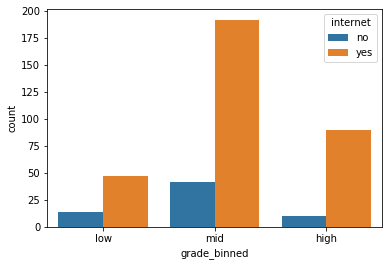

In [42]:
sns.countplot(data=df, x='grade_binned', hue='internet')

<font size=4 color='#4682B4'>由于家里无网络环境的学生人数远少于有网络环境的学生人数，因此各选取60个样本进行行均分检验

In [18]:
library(gmodels)
df_u = data.frame(internet = df2['internet'][df['internet'] == 'yes'][0:60], grade = df2['grade_binned'][df['internet'] == 'yes'][0:60])
df_r = data.frame(internet = df2['internet'][df['internet'] == 'no'][0:60], grade = df2['grade_binned'][df['internet'] == 'no'][0:60])
df_88 = rbind(df_u, df_r)
mytable = xtabs(~df_88$internet + df_88$grade)
CrossTable(df_88$internet, df_88$grade)
library(vcdExtra)
CMHtest(mytable)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  120 

 
               | df_88$grade 
df_88$internet |         1 |         2 |         3 | Row Total | 
---------------|-----------|-----------|-----------|-----------|
           yes |         4 |        33 |        23 |        60 | 
               |     1.633 |     0.250 |     2.561 |           | 
               |     0.067 |     0.550 |     0.383 |     0.500 | 
               |     0.267 |     0.458 |     0.697 |           | 
               |     0.033 |     0.275 |     0.192 |           | 
---------------|-----------|-----------|-----------|-----------|
            no |        11 |        39 |        10 |        60 | 
               |     1.633 |     0.250 |     2.561 |           | 
               |     0.183 |     0.650 |     0.167 |   

Cochran-Mantel-Haenszel Statistics for df_88$internet by df_88$grade 

                 AltHypothesis  Chisq Df      Prob
cor        Nonzero correlation 8.7564  1 0.0030851
rmeans  Row mean scores differ 8.7564  1 0.0030851
cmeans  Col mean scores differ 8.8138  2 0.0121928
general    General association 8.8138  2 0.0121928


<font size=4 color='#4682B4'>根据行均分检验的结果，p值小于0.05，可得出结论：有网络环境的学生与没网络环境的学生的学习成绩有显著性差异。在高分段家中有网络环境的学生比重较大，在低分段家中无网络环境的学生比重较大

<font size=6 color='#4682B4'>学校维度

<font size=5 color='#5CADAD' id='sc_school'>学校之间</font>

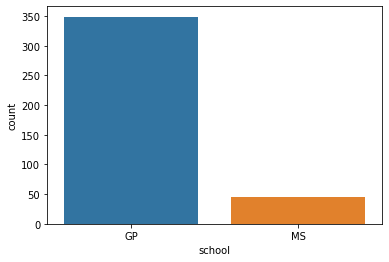

In [25]:
sns.countplot(data=df, x='school')

<font size=4 color='#4682B4'>从上图可知来自MS的样本数远少于来自GP的样本，因此采用各校在成绩分类的占比来分析学校的成绩水平

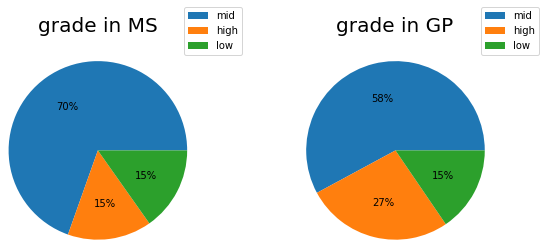

In [11]:
df_MS = df[df['school'] == 'MS']['grade_binned'].value_counts()
df_GP = df[df['school'] == 'GP']['grade_binned'].value_counts()

counts_MS = list(df_MS.values)
labels_MS = list(df_MS.index)
counts_GP = list(df_GP.values)
labels_GP = list(df_GP.index)

plt.figure(figsize=(8, 4))
ax = plt.subplot(1, 2, 1)
plt.pie(counts_MS, autopct='%2.0f%%', radius=1.5)
plt.legend(loc='upper right', labels = labels_MS, bbox_to_anchor=(1.5, 1.5))
plt.text(-1, 2, 'grade in MS', fontsize=20)
ax = plt.subplot(1, 2, 2)
plt.pie(counts_GP, autopct='%2.0f%%', radius=1.5)
plt.legend(loc='upper right', labels = labels_GP, bbox_to_anchor=(1.5, 1.5))
plt.text(-1, 2, 'grade in GP', fontsize=20)
plt.subplots_adjust(wspace=1)

<font size=4 color='#4682B4'>从上图可知，两校在分成绩分类的占比上不一样。在低分段两校占比相同，但在高分段上GP比MS高出了12%，可见从分数上来说，GP的教学效果较MS要好

Text(0.5, 1.0, 'Composition of students in two school')

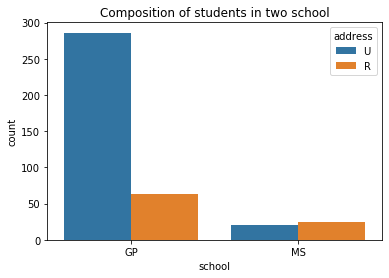

In [26]:
plt.figure()
sns.countplot(data=df, x='school', hue='address')
plt.title('Composition of students in two school')

<font size=4 color='#4682B4'>从上图可知，在GP学校，城镇生源的学生人数远大于乡村生源，可推断该学校位于城镇。<br>在MS学校，城镇生源的人数小于乡村生源人数，可推断该学校位于乡村

<font size=5 color='#5CADAD' id='sc_sup'>学校辅导</font>

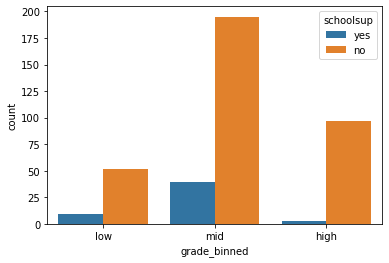

In [44]:
sns.countplot(data=df, x='grade_binned', hue='schoolsup')

In [6]:
wilcox.test(df$G3 ~ df$schoolsup, conf.level = 0.95)


	Wilcoxon rank sum test with continuity correction

data:  df$G3 by df$schoolsup
W = 11037, p-value = 0.002802
alternative hypothesis: true location shift is not equal to 0


<font size=4 color='#4682B4'>根据wilcoxon检验的结果，p值小于0.05，可得出结论：学校辅导对学习成绩有显著性差异

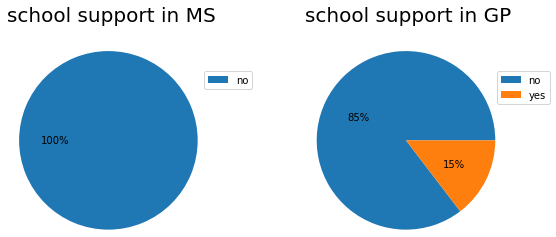

In [35]:
df_MS = df[df['school'] == 'MS']['schoolsup'].value_counts()
df_GP = df[df['school'] == 'GP']['schoolsup'].value_counts()

counts_MS = list(df_MS.values)
labels_MS = list(df_MS.index)
counts_GP = list(df_GP.values)
labels_GP = list(df_GP.index)

plt.figure(figsize=(8, 4))
ax = plt.subplot(1, 2, 1)
plt.pie(counts_MS, autopct='%2.0f%%', radius=1.5)
plt.legend(loc='upper right', labels = labels_MS, bbox_to_anchor=(1.5, 1.0))
plt.text(-1.7, 2, 'school support in MS', fontsize=20)
ax = plt.subplot(1, 2, 2)
plt.pie(counts_GP, autopct='%2.0f%%', radius=1.5)
plt.legend(loc='upper right', labels = labels_GP, bbox_to_anchor=(1.5, 1.0))
plt.text(-1.7, 2, 'school support in GP', fontsize=20)
plt.subplots_adjust(wspace=1)

<font size=4 color='#4682B4'>根据上图可知，位于乡村的MS学校不提供学校服务，而位于城镇的GP学校为部分学生提供学习辅导,接下来分析GP学校提供教学辅导的人员组成

Text(-0.8, 2.5, 'school support')

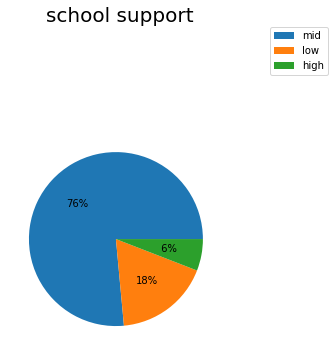

In [39]:
df_sup = df[df['schoolsup'] == 'yes']['grade_binned'].value_counts()
counts = list(df_sup.values)
labels = list(df_sup.index)
plt.pie(counts, autopct='%2.0f%%', radius=1)
plt.legend(loc='best', labels = labels, bbox_to_anchor=(1.5, 1.5))
plt.text(-0.8, 2.5, 'school support', fontsize=20)

<font size=4 color='#4682B4'>可见大部分接受辅导的学生属于中等分段，低分段的学生占比位列第二，或许这也能解释为什么城镇学生在中低分段的占比小于乡村学校

<font size=5 color='#5CADAD' id='sc_ab'>缺席数和挂科数</font>

In [4]:
shapiro.test(df$G3)
shapiro.test(df$failures)
shapiro.test(df$absences)


	Shapiro-Wilk normality test

data:  df$G3
W = 0.92873, p-value = 8.836e-13



	Shapiro-Wilk normality test

data:  df$failures
W = 0.50707, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  df$absences
W = 0.66683, p-value < 2.2e-16


<font size=4 color='#4682B4'>三组数据的p值都小于0.05，可得出结论：这些数据都不符合正态分布,因此采用spearman秩相关描述变量间的相互变化关系

In [5]:
df_temp = data.frame(df$failures, df$G3)
cor(df_temp, method = 'spearman')
cor.test(jitter(df$failures), jitter(df$G3), method = 'spearman')
df_temp = data.frame(df$absences, df$G3)
cor(df_temp, method = 'spearman')
cor.test(jitter(df$absences), jitter(df$G3), method = 'spearman')

,df.failures,df.G3
df.failures,1.0000000,-0.3612235
df.G3,-0.3612235,1.0000000



	Spearman's rank correlation rho

data:  jitter(df$failures) and jitter(df$G3)
S = 12833000, p-value = 5.629e-07
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.2493862 


,df.absences,df.G3
df.absences,1.00000000,0.01773067
df.G3,0.01773067,1.00000000



	Spearman's rank correlation rho

data:  jitter(df$absences) and jitter(df$G3)
S = 10049000, p-value = 0.6675
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.021673 


<font size=4 color='#4682B4'>根据spearman秩和检验的结果，failures对与G3存在线性相关性，absences对G3无显著相关性

<br><font size=6 id='summary'>总结</font>

<font size=4 color='#4682B4'>本文从个人、家庭、学校三个维度对数据集进行了分析，得出以下结论：<br>
    个人：<br>
        （1）亲密关系对学习成绩有显著性影响，结合统计图可得出推论：亲密关系对学习成绩产生负面影响的概率较大<br>        
        （2）学习时间对学习成绩有显著性影响，且线性正相关，结合柱状图得出推论：学习时间定为每周2~10小时比较合适<br>
    家庭：<br>
        （1）生源对学习成绩有显著性影响，整体上来看城镇生源的成绩比乡村生源的成绩要好<br>
        （2）父母的受教育程度与子女的学习成绩呈直线正相关，父母受教育的程度越高，子女成绩好的概率越大<br>
        （3）父母的职业对子女的成绩有显著性影响，其中父亲是教师的学生考70以上是父亲非教师的2.92倍，家庭主妇家的学生考70分以上是母亲有工作的学生的0.35倍。可得出推论：父亲为教师的学生可能经常受到父亲的指导，而母亲是家庭主妇的家庭可能由于经济收入较少导致教育资源匮乏进而影响学习成绩。<br>
        （4）网络环境对学生的学习成绩有显著性影响，结合统计图可得出推论：有网络环境的学生成绩好的概率更大<br>
    学校：<br>
        （1）学校的地理位置对学习成绩有显著性影响，结合统计图可得出推论：位于城镇的学校的学生成绩好的概率更大<br>
        （2）接受学校辅导与否对学生的学习成绩有显著性影响，结合统计图可得出推论：接受学习辅导的学生成绩好的概率更大<br>
    结合上述三个维度，可知居住地、父母受教育程度、父母职业、网络环境、学校地理位置等对学习成绩产生显著性影响的因素具有关联性。笔者认为这些因素能综合反映出家庭的社会地位和经济实力，而经济实力或者社会地位高的家庭能获得更好的教育资源、更有机会受到优质的教育。<br>
    在城镇与乡村学校之间的对比也可以看出教育资源在不同地区的倾斜<br>